In [1]:
import numpy as np

import pytz
import datetime

from astropy import units as u
from astropy.time import Time
from astropy.coordinates import EarthLocation, AltAz, get_sun, get_moon

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [35]:
from astropy import constants

R_matahari = constants.R_sun
R_bulan = 1737.1 * u.km

def ukuran_tampak(R, jarak):
    return (R/jarak).to(u.arcmin, u.dimensionless_angles())

In [36]:
def matahariBulan(waktu, lokasi):
    altAzframe = AltAz(obstime=waktu, location=lokasi)
    matahariAltAz = get_sun(waktu).transform_to(altAzframe)
    bulanAltAz = get_moon(waktu).transform_to(altAzframe)
    separasi = matahariAltAz.separation(bulanAltAz)
    
    return separasi, matahariAltAz, bulanAltAz

In [33]:
tz = pytz.timezone('Asia/Jakarta')
waktu_tebakan = Time(tz.localize(datetime.datetime(1861,7, 8, 12, 10, 0)))

In [37]:
ukuranMatahari = ukuran_tampak(R_matahari, matahariAltAz.distance)
ukuranBulan = ukuran_tampak(R_bulan, bulanAltAz.distance)

Text(0, 0.5, 'Altitud (derajat)')

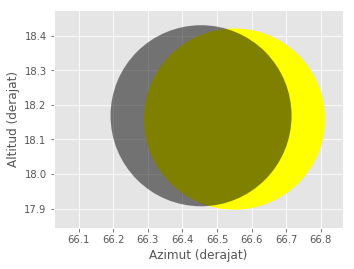

In [41]:
penyengat  = EarthLocation.of_address('pulau penyengat')
rentangWaktu = waktu_tebakan + np.linspace(-400, 400, 100)*u.min
separasi, matahariAltAz, bulanAltAz = matahariBulan(rentangWaktu, penyengat)

puncakGerhana = rentangWaktu[np.argmin(matahariAltAz.separation(bulanAltAz).arcmin)]
separasi, matahariAltAz, bulanAltAz = matahariBulan(puncakGerhana, penyengat)

lingkaranMatahari = plt.Circle((matahariAltAz.az.deg, matahariAltAz.alt.deg), 
                        ukuranMatahari.to(u.deg).value,
                        fc='yellow')
lingkaranBulan = plt.Circle((bulanAltAz.az.deg, bulanAltAz.alt.deg), 
                         ukuranBulan.to(u.deg).value,
                         fc='black', alpha=.5)

ax = plt.subplot(aspect=1)
ax.add_patch(lingkaranMatahari)
ax.add_patch(lingkaranBulan)
jarakTerbesar = max(separasi.deg, ukuranMatahari.to(u.deg).value, ukuranBulan.to(u.deg).value)
plt.xlim(matahariAltAz.az.deg-jarakTerbesar*2, matahariAltAz.az.deg+jarakTerbesar*1.2)
plt.ylim(matahariAltAz.alt.deg-jarakTerbesar*1.2, matahariAltAz.alt.deg+jarakTerbesar*1.2)

plt.xlabel('Azimut (derajat)')
plt.ylabel('Altitud (derajat)')

In [46]:
penyengat  = EarthLocation.of_address('pulau penyengat')
rentangWaktu = waktu_tebakan + np.linspace(-400, 400, 100)*u.min
separasi, matahariAltAz, bulanAltAz = matahariBulan(rentangWaktu, penyengat)

puncakGerhana = rentangWaktu[np.argmin(matahariAltAz.separation(bulanAltAz).arcmin)]
rentangWaktu = puncakGerhana + np.linspace(-100, 100, 100)*u.min
i=0
for t in rentangWaktu:
    i+=1
    separasi, matahariAltAz, bulanAltAz = matahariBulan(t, penyengat)

    lingkaranMatahari = plt.Circle((matahariAltAz.az.deg, matahariAltAz.alt.deg), 
                            ukuranMatahari.to(u.deg).value,
                            fc='yellow')
    lingkaranBulan = plt.Circle((bulanAltAz.az.deg, bulanAltAz.alt.deg), 
                             ukuranBulan.to(u.deg).value,
                             fc='black', alpha=.5)

    ax = plt.subplot(aspect=1)
    ax.add_patch(lingkaranMatahari)
    ax.add_patch(lingkaranBulan)
    jarakTerbesar = max(separasi.deg, ukuranMatahari.to(u.deg).value, ukuranBulan.to(u.deg).value)
    plt.xlim(matahariAltAz.az.deg-jarakTerbesar*2, matahariAltAz.az.deg+jarakTerbesar*2)
    plt.ylim(matahariAltAz.alt.deg-jarakTerbesar*2, matahariAltAz.alt.deg+jarakTerbesar*2)

    plt.xlabel('Azimut (derajat)')
    plt.ylabel('Altitud (derajat)')
    plt.title(t)
    plt.savefig('plot1861/plot{}.png'.format(i))
    plt.clf()

<Figure size 432x288 with 0 Axes>